In [2]:
# header: settings 
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 4.0)
from ipywidgets.widgets import interact, fixed

# 2. Useful concepts from Statistics 

Important basic Datamining question: ** Discrimination between *pattern* and *randomness* **

* When can we call a discovered regularity statistically significant?
* How does a variable $x$ depend from another variable $y$?
* Under what conditions can we state that there is a significant deviation from a norm?
 * (norm here means an average pattern or background pattern)

** General Procedure **

1. compute a statistic (an estimator) $s$, (in German: Prüfgröße)
2. derive (or compute) how $s$ is distributed (as probability density distribution) under the assumption that a null hypothesis $H_0$ holds.
   * this may require definition (later: test for) assumptions on the sample pdf
3. compute then, what value $\hat{s}$ of $s$ you obtain for the actual data set(s).
4. if $\hat{s}$ falls into an unlikely area: conclude, that $H_0$ can be rejected
5. if not, do **not** conclude that $H_0$ is valid, or is proven!

$\to$ Statistics can never prove a null hypothesis, only reject it.

The result is often reported as $p$-value: 
* $(p<0.05)$ means, that the probability to find a value $\hat{s}$ like that or more extreme is smaller than 5%.


# 2.1 Detection of systematic deviations

**Basic question**: to judge whether two probability densities $P_A, P_B$ are equal or different (at hand of limited samples)

* First we approach the 'weaker' question: are the means equal?

* Given: two 'unpaired' samples $\{ x_i^A\},~\{ x_i^B\}$ of size $N_A$ and $N_B$, drawn from unknown probability densities $P_A$ and $P_B$.
 * note that unpaired means that the features $x^A$ and $x^B$ are not measurements from the same objects (e.g. the same test person), but totally independent measurements.

**Empirical Means:**
$$\hat\mu_A = \frac{1}{N_A}\sum\limits_{i=1}^{N_A}x_i^A $$

$$\hat\mu_B = \frac{1}{N_B}\sum\limits_{i=1}^{N_B}x_i^B $$

for the estimation of the actual mean values $\mu_A,~\mu_B$ of $P_A,~P_B$ 

* Null hypothesis: $\mu_A = \mu_B ~~(H_0)$
 * these are the true means, not the sample means!
* We search a statistics (a data-derived feature) which varies systematically according to the likelihood that the null hypothesis holds.

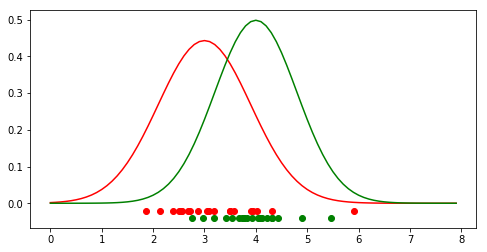

In [17]:
# figure to illustrate 2 samples with underlying pdfs
N = 20
sigma_a = 0.9; mu_a = 3; ya = np.random.randn(N)*sigma_a + mu_a; 
plt.plot(ya, -0.02*np.ones(N), "ro")
sigma_b = 0.8; mu_b = 4; yb = np.random.randn(N)*sigma_b + mu_b; 
plt.plot(yb, -0.04*np.ones(N), "go")
x = np.arange(0, 8, 0.1); 
pa = 1/np.sqrt(2*np.pi*sigma_a**2)*np.exp(-0.5*((x-mu_a)/sigma_a)**2)
pb = sp.stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x, pa, "r-"); plt.plot(x, pb, "g-");
# Discriminating two propability densities by their means

Intuitive Selection for 'the statistics': Difference of the sample means 
$$|\hat\mu_A - \hat\mu_B|$$

but then the value depends strongly on the width (i.e. the $\sqrt{\mbox{variance}}$) of the underlying distribution $P_{A/B}(x)$.

For that reason, a normalization is done:
$$\displaystyle t = \frac{|\hat\mu_A - \hat\mu_B|}{\hat\sigma_{err}}$$
with 
$$\hat\sigma_{err}= \sqrt{\left(\frac{1}{N_A} + \frac{1}{N_B}\right) \frac{\sum\limits_{i=1}^{N_A}{(x_i^A-\hat\mu_A)^2} +\sum\limits_{i=1}^{N_B}{(x_i^B-\hat\mu_B)^2}}{N_A + N_B -2}}$$

* note that the standard error is not the standard deviation but the standard deviation / $\sqrt{N}$. The reason is that the standard deviation of estimated means of a sample of size $N$ scales with $1/\sqrt{N}$.

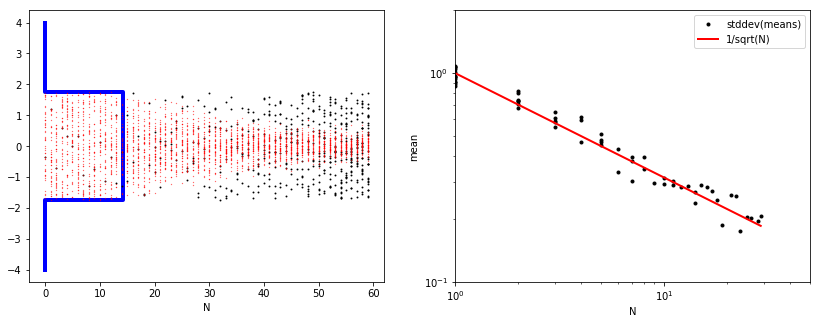

In [79]:
## quick test for that:
plt.figure(figsize=(14,5))
xa = np.arange(-4, 4, 0.1)
plt.subplot(121); 
# plt.plot(50*scipy.stats.norm.pdf(xa), xa, "b-", lw=4)
plt.plot(np.array([0, 0, 1./3.5, 1./3.5, 0, 0])*50, 
         [-4, -1.75, -1.75, 1.75, 1.75, 4], "b-", lw=4) 
## Nar = array of N values: N = nr. of repetitions, e.g. nr. of runs
Nar = (10**np.arange(0, 1.5, 0.025)).astype(np.integer)
stdar = np.zeros(np.shape(Nar))
M = 50 # sample size, try also 10, 20, 100 and see how plot changes
for k, N in enumerate(Nar):
    mv = np.zeros(M)
    for j in range(M):
        # x = np.random.randn(N) # draw normal distributed sample (=data)
        x = 3.5*np.random.rand(N)-1.75 # uncomment this for a uniform distribution
        mv[j] = np.mean(x) # compute the sample mean for run j
    stdar[k] = np.std(mv) # this is the stddev of all M repetitions
    # now plot each result for each N in a column into the left plot 
    #plt.plot(N/50.*ones(N), x, "k.", markersize=0.8); plt.xlabel("log10(N)");
    #plt.plot(N/50.*ones(M), mv, "r.", markersize=0.5); 
    plt.plot(k*np.ones(N), x, "k.", markersize=1.8); plt.xlabel("N");
    plt.plot(k*np.ones(M), mv, "r.", markersize=0.5); 
# now plot into second plot the "stddev of sample means" as fn of N
plt.subplot(122)
plt.plot(Nar, stdar, 'k.', label='stddev(means)'); 
# and plot our expectation (1/sqrt(N))
plt.plot(Nar, 1.0/np.sqrt(Nar), 'r-', lw=2, label='1/sqrt(N)')
plt.xlabel("N"); plt.ylabel("mean")
plt.axis([1,50,0.1,2]); plt.legend(); plt.loglog(); 

** Explanation for the denominator **
* If $H_0$ holds, $\mu_A - \mu_B = 0~~\mbox{which we abbreviate as} \rightarrow \mu_{AB} = 0$
* Question: what is the variance of $\mu_{AB}$?
* $\to$ the more samples we have, the better the empirical mean  $\hat\mu_x$ approximates the real mean $\mu_x$.

$$\sigma^2(\hat\mu_A) = \frac{\sigma^2(P_A)}{N_A},~\text{(the same for B)}$$

$$\Rightarrow \sigma(\hat\mu_A) = \frac{\sigma(P_A)}{\sqrt{N_A}}$$

* Wanted: the variance of a linear combination
$$\sigma^2(\alpha x_1 + \beta x_2) = \alpha^2 \sigma^2(x_1) + \beta^2 \sigma^2(x_2)$$ 

* in our case with  $\alpha=1, \beta=-1$.

Since $\beta^2 = (-1)^2 = 1$ we can see: 
$$\sigma^2(\hat\mu_A - \hat\mu_B) = \sigma^2(\hat\mu_A) + \sigma^2(\hat\mu_B)$$

* Inserting from above we find

$$ \sigma^2(\hat\mu_A - \hat\mu_B) = \frac{\sigma^2(P_A)}{N_A} + \frac{\sigma^2(P_B)}{N_B}$$

Now we assume that $\displaystyle\sigma^2(P_A) = \sigma^2(P_B) = \sigma_{AB}^2 $

$$\Rightarrow \sigma^2(\hat\mu_A - \hat\mu_B) = \sigma^2_{AB}\left(\frac{1}{N_A}+\frac{1}{N_B}\right)$$

* The standard deviation is $\displaystyle\sqrt{\sigma^2}$

$$\to \sigma(\hat\mu_A-\hat\mu_B) = \sqrt{\sigma^2_{AB}\left(\frac{1}{N_A}+\frac{1}{N_B}\right)}$$

* Last step: estimating the variance of $\sigma^2_{AB}$ from the data

$$\sigma^2_{AB} = \frac{\sum\limits_{i=1}^{N_A}{(x_i^A-\hat\mu_A)^2} +\sum\limits_{i=1}^{N_B}{(x_i^B-\hat\mu_B)^2}}{N_A + N_B - 2}$$

* The denominator has the sum of item minus 2, since both empirical means $\hat \mu_A$ and $\hat\mu_B$ are already estimated from the data. 

* Next step: compute the distribution function for the statistics $t$ under the null hypothesis
 * = probability density $p(t)$ that this value of $t$ is observed under valid $H_0$

* Assumption: $\sigma(P_A)=\sigma(P_B)$ 
 * we actually need first to verify this, for which the F-test is used (details: see NR in C, <http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf>)
 
**Result: **
* If $H_0$ is true, $t$ is distributed according to a so-called student-t-distribution with $\nu = N_A + N_B -2 $ degrees of freedoms
 * more about the t-distribution in Sec. 2.2.2
 
* The density function is 

$$P(t, \nu) = {\cal N}_\nu \left(1+\frac{t^2}{\nu}\right)^{-(\nu+1)/2}$$

* ${\cal N}_\nu$ is chosen so that $\int_{-\infty}^{\infty} P(t', \nu ) dt' =1$.



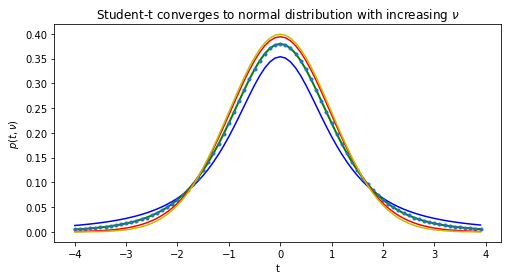

In [76]:
# plot t-distribution 
t = np.arange(-4, 4, 0.1)
plt.plot(t, sp.stats.t.pdf(t, 2), "b-")
plt.plot(t, sp.stats.t.pdf(t, 5), "g-", linewidth=2)
nu = 5; plt.plot(t, 0.3795*(1+(t*t/nu))**(-(nu+1)/2), '.') # approx...
plt.plot(t, sp.stats.t.pdf(t, 20), "r-")
plt.plot(t, sp.stats.norm.pdf(t), "y-")
plt.xlabel(r't'); plt.ylabel(r'$ p(t, \nu)$')
plt.title(r'Student-t converges to normal distribution with increasing $\nu$');

* **Wanted**: critical $t_c$, so that if $\hat{t}$ is equal to $t_c$ or more extreme, $H_0$ can be rejected.
* Depends upon the wished significance level, e.g. 5%, 1% or 0.1%.
* In the one-sided test, we assume that $\mu_A > \mu_B$ (so positive t)
 * The area below the student-t density function from $t_c$ to $\infty$ is the probability that a value $t>t_c$ occurs randomly.
* two-sided test: $|\mu_A - \mu_B| \neq 0$
 * $\Rightarrow$ area below the t-pdf from $[-\infty, -t_c]$ plus from $[t_c, \infty]$ wanted.
* We compute the cumulative density function (integral) $A(t,\nu)$

$$ A(t,\nu) = \int\limits_{-\infty}^t P(t', \nu) dt'$$

* $A(t,\nu)$ is a sigmoidal monotonously growing function with asymptodes 0 and 1, and $A(0) = 0.5$.
So we take 2 steps:
* Step 1: select the level of significance $\alpha$
 * also called _probability of error_ 
* Step 2: determine $t_c$ at hand of $1-A(t_c, \nu) = \alpha$
 * note that for the two-sided test the left side becomes $2-2A(t, \nu)$

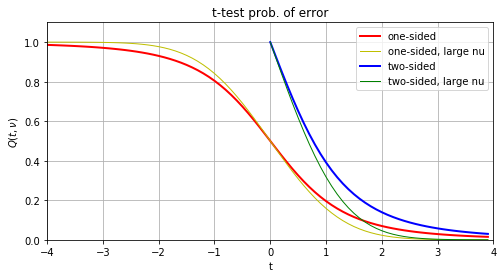

In [81]:
# plot 1-A as function of t for nu dofs
nu = 3 # try also nu=2
t = np.arange(-4, 4, 0.1)
plt.plot(t, 1-sp.stats.t.cdf(t, nu), "r-", linewidth=2, label="one-sided")
plt.plot(t, 1-sp.stats.t.cdf(t, 1000), "y-", linewidth=1, label="one-sided, large nu")
t = np.arange(0, 4, 0.1)
plt.plot(t, 2 - 2*sp.stats.t.cdf(t, nu), "b-", linewidth=2, label="two-sided")
plt.plot(t, 2 - 2*sp.stats.t.cdf(t, 1000), "g-", linewidth=1, label="two-sided, large nu")
plt.xlabel(r't'); plt.ylabel(r'$ Q(t, \nu)$'); plt.title('t-test prob. of error')
plt.grid(); plt.axis([-4, 4, 0, 1.1]); plt.legend();

* the above figure depicts the probability $P(\hat t \ge t_c)$ that the empirical value $\hat t$ is $t_c$ or greater, blue for the two-sided, red for the one-sided t-test
 * yellow resp. green plots are for large nu (converges to normal pdf)
* if $\hat t \ge t_c$: reject $H_0$
 * ... it is just unlikely that such a large value of $t$ occurs under $H_0$
* but if $\hat t < t_c: \to $ no statement about $H_0$ can be made.

** Remarks:**

* valid only under the assumption of equal variances $\sigma^2(P_A) = \sigma^2(P_B)$
 * if not the case, a different test is needed (the Welch's t-test)
* Note that the two-sided level of significance is exactly doubled compared to the one-sided test. The reason is that
$$P = \int_{-\infty}^{-t} P(t', \nu) dt' + \int_{t}^{+\infty} P(t', \nu) dt' = 2 \int_{t}^{\infty}P(t', \nu) dt'$$

* Usually the critical values $t_c$ are looked up in tables:

<table>
<tr> <th>$\nu$</th><th>$t_{0.01}$ </th><th>$t_{0.001}$ </th></tr>
<tr><td>10</td><td>2.76</td><td>4.14</td></tr>
<tr><td>60</td><td>2.39</td><td>3.23</td></tr>
<tr><td>$\infty$</td><td>2.33</td><td>3.09</td></tr>
</table>

In [58]:
# compute values with inverse survival function isf
qlist = [0.05, 0.01, 0.005, 0.001, 1e-4]
print("nu\\alpha", qlist)
print("-----------------------------------------")
for nu in [10, 20, 50, 99, 999]: 
    print(nu, "\t", end='')
    for q in qlist:
        print("{:4.2f}\t".format(sp.stats.t.isf(q, nu)), end="")
    print()

nu\alpha [0.05, 0.01, 0.005, 0.001, 0.0001]
-----------------------------------------
10 	1.81	2.76	3.17	4.14	5.69	
20 	1.72	2.53	2.85	3.55	4.54	
50 	1.68	2.40	2.68	3.26	4.01	
99 	1.66	2.36	2.63	3.17	3.86	
999 	1.65	2.33	2.58	3.10	3.73	


## 2.2. Excursion: $\chi^2$- und Student-$t$-distribution

### 2.2.1 $\chi^2$-distribution

Let $X_1, X_2, \dots, X_n$ be pairwise independent normal distributed random variables with variance $\sigma_i^2 = 1$ and mean $\mu_i = 0$. 

Then the sum $Y$ of their squares
$$	Y = \sum_{i=1}^N X_i^2 $$
is $\chi^2$-distributed with $\nu = N$ degrees of freedom.

Properties: $\langle Y \rangle = N,~~~\sigma^2(Y) = 2N$

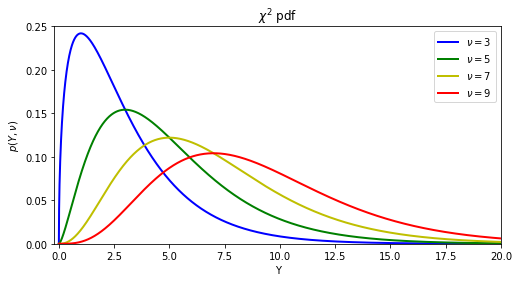

In [61]:
y = np.arange(0, 20, 0.01)
for (nu, co)  in [[3, 'b'], [5, 'g'], [7, 'y'], [9,'r']]:
    plt.plot(y, sp.stats.chi2.pdf(y, nu), co, lw=2, label=r'$\nu=$%d' % (nu))
plt.xlabel(r'Y'); plt.ylabel(r'$p(Y, \nu)$'); plt.title(r'$\chi^2$ pdf'); 
plt.legend(); plt.axis([-0.20,20,0,0.25]);

* The above figure shows that 
 * mean and variance grow with $\nu$
 * small values become increasingly unlikely with large $\nu$


[ws1819EOT2.1017]

### 2.2.2. Student-$t$-distribution

Let $X$ be normal distributed with mean $0$ and variance $1$, and $Y$ an independent $\chi^2$-distributed random variable with $\nu$ degrees of freedom. Then 
$$	t=\frac{X}{\sqrt{Y/\nu}} $$
is defined as Student-$t$-distributed with $\nu$ degrees of freedom 

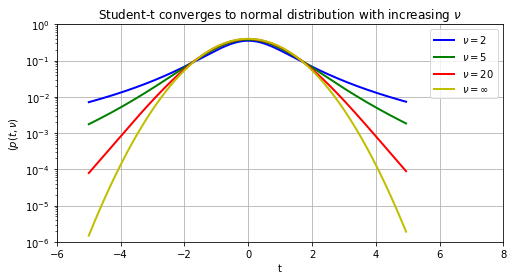

In [62]:
t = np.arange(-5, 5, 0.05)
plt.plot(t, sp.stats.t.pdf(t, 2), "b-",lw=2,label=r'$\nu=2$')
plt.plot(t, sp.stats.t.pdf(t, 5), "g-",lw=2,label=r'$\nu=5$')
plt.plot(t, sp.stats.t.pdf(t, 20),"r-",lw=2,label=r'$\nu=20$')
plt.plot(t, sp.stats.norm.pdf(t), "y-",lw=2,label=r'$\nu=\infty$')
plt.xlabel(r't'); plt.ylabel(r'$ (p(t, \nu)$')
plt.title(r'Student-t converges to normal distribution with increasing $\nu$')
plt.semilogy(); plt.legend(); plt.axis([-6,8, 1e-6, 1]); plt.grid();

Properties: 
* For $\nu \gg 1$, the student-t resembles a normal distribution, 
however, the decay is only polynomial in the tails ($o(t^{-(2\nu+1)})$).
$$ \langle T_\nu \rangle = 0,~~~ \sigma^2(T_\nu) = \frac{\nu}{\nu-2},~~~ \lim\limits_{\nu\to\infty}T_\nu = \text{normal pdf}$$

## 2.3. Tests to discriminate distributions

**Motivation:** 
* $t$-test/F-test merely look on mean resp. variance of a distribution, which are only very coarse features of a detailed distribution.
* The following example depicts two distributions of equal mean and equal variance:

normal: mean = -0.00000, variance = 0.999985
2-gaus: mean =  0.00000, variance = 0.999949


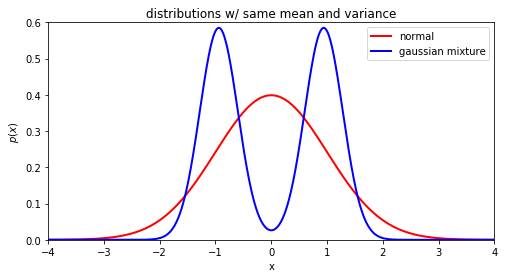

In [3]:
# plot
q = 0.01; normpdf = sp.stats.norm.pdf
x = np.arange(-5, 5, q); 
y1 = normpdf(x, 0)
y2 = 0.5*(normpdf(x, -0.94, 0.3411) + normpdf(x, 0.94, 0.3411))
plt.plot(x, y1, "r-", lw=2, label='normal')
plt.plot(x, y2, "b-", lw=2, label='gaussian mixture')
print("normal: mean = {:8.5f}, variance = {:f}".format(np.sum(q*x*y1), np.sum(q*y1*(x**2))))
print("2-gaus: mean = %8.5f, variance = %f" % (sum(q*x*y2), sum(q*y2*(x**2))))
plt.xlabel(r'x'); plt.ylabel(r'$p(x)$'); 
plt.title('distributions w/ same mean and variance'); 
plt.legend(); plt.axis([-4, 4, 0, 0.6]);

** Wanted:** methods that allow to uncover differences between such distributions.

* **Null hypothesis** $H_0$: Two data sets are samples from an identical probability distribution
 * here, again, it is only possible to reject $H_0$
 * no sample size, however large, will suffice to uncover a real existent yet very small difference (e.g. think of $10^{-10}$...)
 
Test on distributions has two aspects:
* **A1. Variable type: Continuous vs. Discrete**
 * continuous features lead to density functions
 * discrete features lead to frequency distributions (histograms), where $A_i$ is the number of instances in bin $i$
 * continuous features can always be reduced to discrete features by quantization. This, however, destroys information.

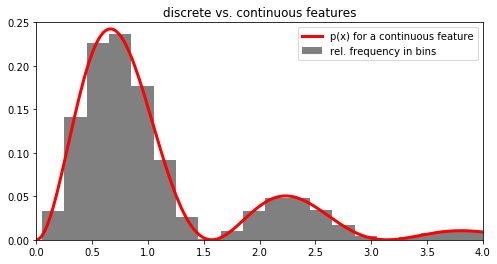

In [4]:
# histogram figure
ts = np.arange(0, 5, 0.020)
x = np.exp(-ts)*np.sin(2*ts)**2
plt.plot(ts, x/2, "r-", lw=3, label='p(x) for a continuous feature')
plt.bar(ts[0::10]+0.15, x[7::10]/2.0, color='gray', width=0.2, label='rel. frequency in bins')
plt.axis([0, 4, 0, 0.25]); plt.legend(); plt.title("discrete vs. continuous features");

** A2. Comparison target: against data vs. against reference **

We wish to compare the underlying (unknown) distribution of the observed data with 
1. a given distribution (expectation, norm, reference)
 * Are all stars at the sky uniformly distributed?
2. the distribution of another dataset (e.g. data under a different condition)
 * Is the grade distribution in biology the same as in law?

**Methods:**
* for discrete distributions: $\to$ ** $\chi^2$ test**
* for continuous distributions: $\to$ ** Kolmogorov-Smirnov test**
* There are two variants according to A2

### 2.3.1. $\chi^2$-test

* We start with A2 case 1 (i.e. discrete binning)

** Given:**
* Dataset as discrete distribution with $i=1,\dots, M$ bins
* $A_i \hat{=}$ number of events in bin $i$ <integer>
* $a_i$ is the expected number <contiuous, coming from model/hypothesis>

<img src="images/chi2-knowndistrib.png" width="50%">

**Case 1: Comparison of the a dataset with a given distribution **

** Statistics:** 

$$\chi^2 = \sum_{i=1}^M\frac{(A_i-a_i)^2}{a_i}$$

* Note that the denominator is the variance of the numerator
* You can regard the measurement as 'throwing a dart arrow on the wall of bins': 
 * bin $i$ will be realized with probability 
 $$p = \frac{a_i}{\sum a_i}$$
 * Then the expected number (in $n$ trials) is $\mu=np = a_i$.
 * The variance is in such Bernoulli-experiments 
   $$\sigma^2 = npq = np(1-p)$$
 * approximately this is $np = a_i$. This motivates the denominator.
 
* For large $\chi^2$ $\Rightarrow$ large deviations between the distributions
* Ignore all terms with  $a_i = 0$ (division by zero problem)
* From Pearson we know: for large $M$, the denominator will be normal distributed.
* If $H_0$ holds, $\to~~a_i-A_i=\epsilon_i$, so errors are normal distributed.
* thus (according to the definition) the sum is $\chi^2$-distributed with $M$ degrees of freedom, independent from the distributions in the bins.
* Distribution of the statistics $\chi^2$ with pdf $p(x)$ under the assumption that $H_0$ holds is the integral of the $\chi^2$-density from $\chi^2$ to $\infty$.
$$ \int_0^{\chi^2} p(\chi^2) d(\chi^2) = P(\chi^2) = 1 - Q (\chi^2)$$
* probability that an observed value $\hat\chi^2$ is larger  ($\hat\chi^2>\chi^2_c$) just by accident is $Q(\chi_c^2, \nu)$.

<img src="images/chi2-cdf.png" width="50%">

$$ Q(\chi^2,\nu) = \frac{1}{\Gamma(\frac{\nu}{2})} \int\limits_{\chi^2}^\infty
e^{-t} t^{\frac{\nu}{2}-1} dt$$
with 
$$\Gamma(x) = \int\limits_0^\infty e^{-t} t^{x-1} dt.$$

In [5]:
# significance level figure
big_font = {'fontname':'Arial', 'size':'16'} 
def plotcdf(nu=4, alpha=0.1):
    y = np.arange(0, 50, 0.2)
    Qchi2 = 1-sp.stats.chi2.cdf(y, nu)
    plt.plot(y, Qchi2, linewidth=2)
    plt.xlabel(r'Y', **big_font); 
    plt.ylabel(r'$Q(Y, \nu)$', **big_font)
    i = np.argmin(np.abs(Qchi2-alpha))
    yc = Qchi2[i]
    plt.plot([y[i], y[i]], [0, yc], "k")
    plt.plot([0, y[i]], [yc, yc], "k")
    plt.text(y[i], yc+0.1, r'$\chi^2_c(\alpha=%.3f) = %f$' % (alpha, y[i]), **big_font)
    plt.axis([0, 20, 0, 1])
    
interact(plotcdf, nu=(1,20,1), alpha=(0,1,0.01));

interactive(children=(IntSlider(value=4, description='nu', max=20, min=1), FloatSlider(value=0.1, description=…

** Remark:**
* $\Gamma(x+1) = x!$, if $x \in N$
* degrees of freedom $\nu$:
 * $\nu = M$ if the $a_i$s were not normalized 
 * $\nu = M-1$ if $\sum a_i = \sum A_i$ was used for normalization.
 * Each boundary condition eliminates one degree of freedom.

** Case 2: Comparison of two datasets**
* New statistics: 
$$ \chi^2 =  \sum_{i=1}^M\frac{(A_i-B_i)^2}{A_i+B_i}$$
* Variance:
$$\sigma^2(A_i - B_i) = \sigma^2(A_i) + \sigma^2(B_i) \approx A_i + B_i$$ 
under the assumption of large sample size and small probability of the bins
 * The variance of the difference is the added variances of the summands!
* The terms of the sum are again approximately normal distributed with mean 0 and variance 1.
* Therefore the statistic $\chi^2$ is again approximately $\chi^2$-distributed.
* The degrees of freedom are, as above: $\nu = M$ minus the number of boundary conditions.

**Remark concerning the degrees of freedom:**

** Example:** draw a sample $\{v_1, \dots, v_N\}$ from a random variable and compute the empiric mean 
$$\hat\mu_v = \frac{1}{N} \sum_{i=1}^{N} v_i$$
* Estimating the variance by 
$$\sigma^2(v) = \frac{1}{N}\sum\limits_{i=1}^N (v_i - \hat\mu_v)^2$$
will underestimate the true variance.
* The cause is that $\hat\mu_v$ is not the true mean, but a value that is computed from the sample itself.
 * ** it thus lies also closer to the concrete data**
* to improve the estimate, particularly for small $N$, we can change the factor 1/N to 1/(N-1)
$$\hat \sigma^2(v) = \frac{1}{N-1}\sum (v_i - \hat\mu_v)^2$$
* Mathematical Analysis shows: on average, the $N-1$ norm is optimal. The estimator is said to be unbiased.

<img src="images/empiricvariance_convergence.png" width="50%">

### 2.3.2 Kolmogorov-Smirnov Test

** Given:** 
* two samples 
$$ \{x_i^A\}_{i=1,\dots,N_A}, \{x_i^B\}_{i=1,\dots,N_B}$$
* optionally: Comparison with a hypothetical distribution 
$$P(x) = \int_{-\infty}^{x}p(x')dx'$$

** Goal:** 
* to check, whether the distributions differ significantly 

1. Calculation of the empiric cumulative distribution

$$ F_A(x) = \frac{1}{N_A} \sum_i \Theta(x - x_i^A) ~\mbox{with}~ \Theta(x) = \left\{ 
\begin{array}{rl}
1 & ~\text{if}~ x \ge 0 \\
0 & ~\text{else}~ \\
\end{array}
\right.
$$

<img src="images/Kolmogorov.png" width="50%">

2. Computation of the statistics
$$ D = \max_x \left| F_A(x) - F_B(x) \right| $$
* respective: $\displaystyle D = \max_x \left| F_A(x) - P(x) \right|$ in case of the comparison agains a reference distribution

[ws1819EOT3.1024]

## Announcement:
* aus raumorganisatorischen Gründen musste folgender Veranstaltung ein neuer Raum zugeteilt werden:
* VA 392123 | wöchentlich Mi 12:00-14:00 Uhr 23.01.2019-30.01.2019: Introduction to Data mining
* Der neue Raum ist H1.

** Alternative Statistic: **
* Difference area between the distribution functions
 * yet this is not invariant on scaling or warping of the variables 

3. Derive the distribution of $D$ under the assumption that $H_0$ is true
$$ P(D \ge \hat D) \cong Q_{KS} \left(\sqrt{\frac{N_A
    N_B}{N_A+N_B}}\hat D \right)$$
$$ \text{where}~Q_{KS}(\lambda)= 2 \sum\limits_{j=1}^\infty (-1)^{j-1} e^{-2j^2 \lambda^2} $$

In [25]:
sp.stats.ks_2samp(np.random.randn(200), np.random.randn(200)+0.5) # D_KS and p value

Ks_2sampResult(statistic=0.28500000000000003, pvalue=1.1477873287896804e-07)

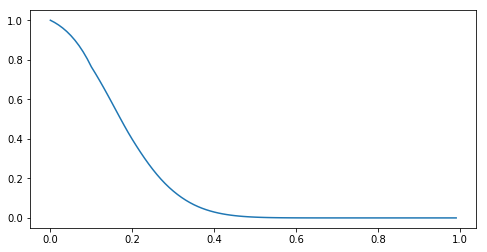

In [24]:
t = np.arange(0, 1, 0.01); plt.plot(t, 1-sp.stats.ksone(10).cdf(t));

* The approximation is already good, if the root is larger than 4
* again: $H_0$ can only be rejected, never be proven
* practical solution: table for $D_{crit}(\alpha)$ for level of significance $\alpha$
* Advantage against $\chi^2$-test:
 * no need for condensing data into histograms
 * no artificial quantization (which destroys information)
 